# **Put-to-Light (PTL) System & Constructive Algorithm Design**



---

## **📚 Student Data**
- **Name**: Jesús Ricardo Gandica Velasco  
- **Student ID**: 1000259918
- **Python Ver.**: 3.11.5
- **Course**: Heurística – 2025-1  
- **Professor**: Juan G. Villegas  
- **Date**: 20/02/2025  

---

## **📦 PTL System Overview**
A **put-to-light system** assigns orders (batches) to zones/positions for classification. Key components:  
- **Orders**: Composed of SKUs; cannot split orders.  
- **Zones/Positions**: Workers travel between positions at speed `v`.  
- **Objective**: Balance workloads (time = SKU processing + travel) across zones.  



# **📚 Importing Libraries**



## **Key Libraries for the PTL Problem**
To implement and solve the PTL problem, the following Python libraries are essential:

1. **`pandas`**:  
   - For reading and manipulating instance data.     

2. **`numpy`**:  
   - For numerical computations.     

3. **`matplotlib`**:  
   - For visualizing results.  
   - Example:       

4. **`graphviz` or ``**:  
   - For generating the flow charts.     

5. **`time`**:  
   - For measuring algorithm performance.   

5. **`random`**:  
   - For generating different values in the methods.   

In [71]:
%%capture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
import time
import random

In [72]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
# pd.set_option('display.max_rows', None)     # Mostrar todas las filas
# pd.set_option('display.max_colwidth', None) # Mostrar el ancho completo de columnas tipo texto


# **📥 Reading Instance Data**

## **Data Components**  

Instance data for the PTL problem includes:  
- **Orders**: SKU composition (`rp_im`), processing times (`tr_im`).  
- **Zones**: Positions per zone (`s_jk`), distances (`d_jk`).  
- **Workers**: Speed (`v`), zone assignments.  

## Datasets

In [73]:
#ruta = "Data_PTL/Data_40_Salidas_composición_zonas_homogéneas.xlsx"
ruta = "Data_PTL/Data_40_Salidas_composición_zonas_heterogéneas.xlsx"

excel_modelo = pd.ExcelFile(ruta)

#Lectura de conjuntos
Conjunto_pedidos = pd.read_excel(excel_modelo, 'Pedidos', index_col=0) #Pedidos
Conjunto_zonas = pd.read_excel(excel_modelo, 'Zonas', index_col=0) #Zonas
Conjunto_salidas = pd.read_excel(excel_modelo, 'Salidas', index_col=0) #Salidas
Conjunto_skus = pd.read_excel(excel_modelo, 'SKU', index_col=0) #SKUs
#Conjunto_trabajadores = pd.read_excel(excel_modelo, 'Trabajadores', index_col=0) #Trabajadores

#Lectura de parametros de salidas
N_Salidas = pd.read_excel(excel_modelo, 'Salidas_en_cada_zona', index_col=0) #Cantidad de salidas por cada zona
Salidas_por_zona = pd.read_excel(excel_modelo, 'Salidas_pertenece_zona', index_col=0) #Parametro binario, salidas que están incluidas en cada zona
Tiempo_salidas = pd.read_excel(excel_modelo, 'Tiempo_salida', index_col=0) #Tiempo para desplazarse desde el lector al punto medio de cada salida

#Lectura de parametros de SKUs
SKUS_por_pedido = pd.read_excel(excel_modelo, 'SKU_pertenece_pedido', index_col=0) #Parámetro binario, SKUS que están incluidas en un pedido
Tiempo_SKU = pd.read_excel(excel_modelo, 'Tiempo_SKU', index_col=0) #Tiempo total de lectura, conteo, separación, depósito de cada ref por pedidotr

#Lectura de parametros adicionales
Parametros = pd.read_excel(excel_modelo, 'Parametros', index_col=0) #Parametros

### **Sets**

>Set_orders:  $\mathcal{P}$

>Set_zones:  $\mathcal{Z}$

>Set_positions: $\mathcal{S}$

>Set_SKUS: $\mathcal{R}$


In [74]:
pedidos = list(Conjunto_pedidos.index)
zonas = list(Conjunto_zonas.index)
salidas = list(Conjunto_salidas.index)
skus = list(Conjunto_skus.index)

print("Los conjuntos son: \n")
print("Pedidos: ", pedidos)
print("Zonas: ", zonas)
print("Salidas: ", salidas)
print("SKUs: ", skus)


Los conjuntos son: 

Pedidos:  ['Pedido_1', 'Pedido_2', 'Pedido_3', 'Pedido_4', 'Pedido_5', 'Pedido_6', 'Pedido_7', 'Pedido_8', 'Pedido_9', 'Pedido_10', 'Pedido_11', 'Pedido_12', 'Pedido_13', 'Pedido_14', 'Pedido_15', 'Pedido_16', 'Pedido_17', 'Pedido_18', 'Pedido_19', 'Pedido_20', 'Pedido_21', 'Pedido_22', 'Pedido_23', 'Pedido_24', 'Pedido_25', 'Pedido_26', 'Pedido_27', 'Pedido_28', 'Pedido_29', 'Pedido_30', 'Pedido_31', 'Pedido_32', 'Pedido_33', 'Pedido_34', 'Pedido_35', 'Pedido_36', 'Pedido_37', 'Pedido_38', 'Pedido_39', 'Pedido_40']
Zonas:  ['Z1', 'Z2']
Salidas:  ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010', 'S011', 'S012', 'S013', 'S014', 'S015', 'S016', 'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S023', 'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030', 'S031', 'S032', 'S033', 'S034', 'S035', 'S036', 'S037', 'S038', 'S039', 'S040']
SKUs:  ['SKU_1', 'SKU_2', 'SKU_3', 'SKU_4', 'SKU_5', 'SKU_6', 'SKU_7', 'SKU_8', 'SKU_9', 'SKU_10', 'SKU_1

### **Parameters**  

>$v$: speed of movement of the operators  

>$zn$: number of zones in the PTL system  

In [75]:
V = Parametros['v']
ZN = Parametros ['zn']

v = float(V.iloc[0])
zn = float(ZN.iloc[0])


print("Los parametros son: \n")
print("Velocidad de movimiento (v) = ", v)
print("Número de zonas (zn) = ", zn)

Los parametros son: 

Velocidad de movimiento (v) =  61.66
Número de zonas (zn) =  2.0


### **Assignment of Outputs to Zones**  

>$s_{jk}$: Binary parameter, where $s_{jk} = 1$ if output $k \in S$ is in zone $j \in Z$, and $s_{jk} = 0$ otherwise.  

In [76]:
#Salidas que están incluidas en cada zona
s={(j,k):Salidas_por_zona.at[j,k] for k in salidas for j in zonas}

In [77]:
print("Salidas que están incluidas en cada zona: \n")

#Mostrar en forma de dataframe
df_s = pd.DataFrame(data=s.values(), index=pd.MultiIndex.from_tuples(s.keys())).unstack(fill_value=0)

df_s

Salidas que están incluidas en cada zona: 



0                                                                        \
   S001 S002 S003 S004 S005 S006 S007 S008 S009 S010 S011 S012 S013 S014 S015   
Z1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1   
Z2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

                                                                               \
   S016 S017 S018 S019 S020 S021 S022 S023 S024 S025 S026 S027 S028 S029 S030   
Z1    1    1    1    1    1    1    1    1    1    0    0    0    0    0    0   
Z2    0    0    0    0    0    0    0    0    0    1    1    1    1    1    1   

                                                      
   S031 S032 S033 S034 S035 S036 S037 S038 S039 S040  
Z1    0    0    0    0    0    0    0    0    0    0  
Z2    1    1    1    1    1    1    1    1    1    1

### **Assignment of an SKU to an Order**  

>$rp_{im}$: Binary parameter, where $rp_{im} = 1$ if SKU $m \in R$ is required in order $i \in P$, and $rp_{im} = 0$ otherwise.  


In [78]:
rp = {(i, m): SKUS_por_pedido.at[i, m] for m in skus for i in pedidos}

print("SKUs que están incluidas en un pedido: \n")

for i in pedidos:
    print("Para el pedido ", i, " los SKUs son: ")
    skus_pedido = []
    for m in skus:
        if rp[i,m] == 1:
            #dejar solo el numero del sku
            m = m[4:]
            
            skus_pedido.append(m)
    #mostrar en forma de texto
    texto_skus = ', '.join(skus_pedido)
    print(texto_skus)

SKUs que están incluidas en un pedido: 

Para el pedido  Pedido_1  los SKUs son: 
1, 25, 52, 121, 122, 123, 124, 125, 132, 135, 136, 153, 182, 209, 219, 241, 290, 291, 293, 294, 297, 298, 299, 300, 315, 316, 320, 321, 324, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 345, 346, 347, 348, 349, 350, 351, 352, 353, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409
Para el pedido  Pedido_2  los SKUs son: 
4, 47, 49, 52, 53, 54, 57, 121, 122, 123, 124, 125, 129, 154, 185, 199, 211, 219, 241, 247, 290, 291, 293, 297, 298, 299, 300, 315, 316, 320, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 

In [79]:
#Ver todos los sku del pedido i

i = rp.keys()
i = list(i)

pedido1 = i[4][0]

print("Pedido ", pedido1)
cant = 0
for m in skus:
    if rp[pedido1,m]==1:
        cant += 1
        
print("Cantidad de SKU: ", cant)

Pedido  Pedido_5
Cantidad de SKU:  127


In [80]:
# Lista de pedidos con mas SKU's
pedido_cantidades = {}
for i in pedidos:
    cant = 0
    for m in skus:
        if rp[i,m]==1:
            cant += 1
    #Añadir al diccionario
    pedido_cantidades[i] = cant

#Ordenar de mayor a menor
dict(sorted(pedido_cantidades.items(), key=lambda item: item[1], reverse=True))

{'Pedido_16': 144,
 'Pedido_28': 135,
 'Pedido_35': 131,
 'Pedido_5': 127,
 'Pedido_7': 126,
 'Pedido_15': 122,
 'Pedido_22': 121,
 'Pedido_33': 117,
 'Pedido_6': 116,
 'Pedido_38': 115,
 'Pedido_2': 114,
 'Pedido_3': 111,
 'Pedido_17': 111,
 'Pedido_14': 110,
 'Pedido_25': 110,
 'Pedido_40': 110,
 'Pedido_18': 109,
 'Pedido_37': 108,
 'Pedido_4': 107,
 'Pedido_13': 107,
 'Pedido_19': 107,
 'Pedido_9': 106,
 'Pedido_23': 104,
 'Pedido_11': 103,
 'Pedido_12': 102,
 'Pedido_39': 102,
 'Pedido_10': 101,
 'Pedido_27': 101,
 'Pedido_36': 99,
 'Pedido_1': 96,
 'Pedido_26': 96,
 'Pedido_32': 96,
 'Pedido_20': 94,
 'Pedido_30': 93,
 'Pedido_24': 92,
 'Pedido_31': 89,
 'Pedido_21': 85,
 'Pedido_29': 46,
 'Pedido_34': 44,
 'Pedido_8': 43}

### **Distance to Each Output**  

>$d_{jk}$: Distance in meters from the scanner point to output $k \in S$ in zone $j \in Z$. If the output is not in the zone, then $d_{jk} = 0$.  

In [81]:
# Time to Pick an SKU at an Output  

d = {(j, k): Tiempo_salidas.at[j, k] for k in salidas for j in zonas}  

print("Tiempo para desplazarse desde el lector al punto medio de cada salida: \n")
#mostrar en forma de dataframe
df_d = pd.DataFrame(data=d.values(), index=pd.MultiIndex.from_tuples(d.keys())).unstack(fill_value=0)
df_d

Tiempo para desplazarse desde el lector al punto medio de cada salida: 



0                                                                 \
     S001   S002   S003   S004   S005   S006   S007   S008   S009   S010   
Z1  0.305  0.915  1.525  2.135  0.305  0.915  1.525  2.135  2.745  3.355   
Z2  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   

                                                                          \
     S011   S012   S013   S014   S015   S016   S017   S018   S019   S020   
Z1  3.965  4.575  2.745  3.355  3.965  4.575  5.185  5.795  6.405  7.015   
Z2  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   

                                                                          \
     S021   S022   S023   S024   S025   S026   S027   S028   S029   S030   
Z1  5.185  5.795  6.405  7.015  0.000  0.000  0.000  0.000  0.000  0.000   
Z2  0.000  0.000  0.000  0.000  0.305  0.915  1.525  2.135  0.305  0.915   

                                                                          
     S031   S032   S033   S034   S035   S036   S037   S038   S039   S040  
Z1  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  
Z2  1.525  2.135  2.745  3.355  3.965  4.575  2.745  3.355  3.965  4.575

### **New Parameters**  

>$tr_{im}$: Time required to pick all units of a given SKU ($m \in R$) in a specific order ($i \in P$).  




In [82]:
tra = {(i, m): Tiempo_SKU.at[i, m] for m in skus for i in pedidos}  
tra

print("Tiempo total de lectura, conteo, separación, depósito de cada ref por pedido: \n")
#mostrar en forma de dataframe
tra_sin_ceros = {k: v for k, v in tra.items() if v != 0}
tra_sin_ceros

Tiempo total de lectura, conteo, separación, depósito de cada ref por pedido: 



{('Pedido_1', 'SKU_1'): 0.08333333333333333,
 ('Pedido_11', 'SKU_1'): 0.08333333333333333,
 ('Pedido_12', 'SKU_1'): 0.08333333333333333,
 ('Pedido_15', 'SKU_2'): 0.08333333333333333,
 ('Pedido_19', 'SKU_2'): 0.08333333333333333,
 ('Pedido_23', 'SKU_2'): 0.08333333333333333,
 ('Pedido_27', 'SKU_2'): 0.08333333333333333,
 ('Pedido_9', 'SKU_3'): 0.08333333333333333,
 ('Pedido_2', 'SKU_4'): 0.8333333333333333,
 ('Pedido_8', 'SKU_4'): 0.8333333333333333,
 ('Pedido_18', 'SKU_4'): 0.8333333333333333,
 ('Pedido_33', 'SKU_4'): 0.8333333333333333,
 ('Pedido_33', 'SKU_5'): 0.08333333333333333,
 ('Pedido_35', 'SKU_5'): 0.08333333333333333,
 ('Pedido_9', 'SKU_6'): 0.08333333333333333,
 ('Pedido_15', 'SKU_6'): 0.08333333333333333,
 ('Pedido_33', 'SKU_6'): 0.08333333333333333,
 ('Pedido_14', 'SKU_7'): 0.08333333333333333,
 ('Pedido_26', 'SKU_7'): 0.08333333333333333,
 ('Pedido_15', 'SKU_8'): 0.16666666666666666,
 ('Pedido_15', 'SKU_9'): 0.16666666666666666,
 ('Pedido_16', 'SKU_9'): 0.0833333333333333

### **Number of Outputs in Each Zone**  

>$ns_{j}$: Number of outputs in zone $j \in Z$  

In [83]:
n_sal = N_Salidas.Num_Salidas
n_sal

print("Cantidad de salidas por cada zona: \n")
n_sal

Cantidad de salidas por cada zona: 



Zonas
Z1    24
Z2    16
Name: Num_Salidas, dtype: int64

---
# **Methods**
For all given methods we need to have some basic work elements, in this case a baseline order and the type of objective

In [84]:
# Método para calcular la métrica
def calculate_metric(workloads, objective):
    if objective == 'min_avg':
        return sum(workloads.values())/len(workloads)
    elif objective == 'min_diff':
        return max(workloads.values()) - min(workloads.values())
    elif objective == 'min_max':
        return max(workloads.values())

## **Step 1: Precompute Base Time and distances for Each Order**

Calculate base time (without distance) and minimal distances per zone

In [85]:
order_info = {}
for i in pedidos:
    # Tiempo base de procesamiento
    tiempo_procesamiento = sum(tra[(i, m)] for m in skus if rp[(i, m)] == 1)
    
    # Distancias mínimas por zona (solo zonas donde el pedido puede asignarse)
    distancias_zona = {}
    for j in zonas:
        # Posiciones disponibles en la zona j (s_jk=1)
        posiciones_zona = [k for k in salidas if s[(j, k)] == 1]
        if posiciones_zona:
            distancia_min = min(d[(j, k)] for k in posiciones_zona)
            distancias_zona[j] = distancia_min
            
    order_info[i] = {
        'tiempo': tiempo_procesamiento,
        'distancias': distancias_zona
    }
    
order_info

{'Pedido_1': {'tiempo': 14.499999999999995,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_2': {'tiempo': 26.000000000000007,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_3': {'tiempo': 20.166666666666668,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_4': {'tiempo': 20.5, 'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_5': {'tiempo': 25.83333333333334,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_6': {'tiempo': 23.583333333333332,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_7': {'tiempo': 26.166666666666675,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_8': {'tiempo': 5.083333333333334,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_9': {'tiempo': 18.58333333333334,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_10': {'tiempo': 17.66666666666667,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_11': {'tiempo': 18.41666666666667,
  'distancias': {'Z1': 0.305, 'Z2': 0.305}},
 'Pedido_12': {'tiempo': 17.083333333333

## **Step 2: Select the objective function for the algorithm**

- **min_avg**: Minimizes the average classification time across zones.
- **min_diff**: Minimizes the difference between the maximum and minimum classification times.
- **min_max**: Minimizes the maximum classification time among all zones.


In [86]:
# OBJECTIVE = 'min_diff'  # Opciones: 'min_avg', 'min_diff', 'min_max'
OBJECTIVE = 'min_diff'  
#OBJECTIVE = 'min_diff'  

## **Constructive methods**

---

### **Greedy Algorrithm construction**

- **Initialization:** Set up dictionaries for workloads (initially zero for each zone), available positions (each zone’s positions sorted by increasing distance), and an empty assignments record.
- **Order Sorting:** If the objective is 'min_max', sort orders in descending order by their classification time; otherwise, maintain the original order.
- **Candidate Generation:** For each order, generate candidate assignments by:
  - Checking each zone for available positions and ensuring the zone has a defined distance for the order.
  - Selecting the closest available position in the zone.
  - Calculating the order’s classification time (order time + 2 × travel time).
- **Candidate Selection:** Based on the objective:
  - For **min_avg**, pick the candidate with the smallest classification time.
  - For **min_diff**, simulate the assignment in each zone and select the candidate that minimizes the potential workload difference.
  - For **min_max**, choose the candidate that minimizes the potential new maximum workload.
- **Assignment Update:** Update the selected zone’s workload by adding the order’s classification time, remove the used position from available positions, and record the assignment.
- **Return Results:** After processing all orders, return the assignments and the updated workloads.



In [87]:
import time

def greedy_construction(objective, pedidos, zonas, salidas, s, d, order_info, v, rp):
    start = time.perf_counter() # Iniciar temporizador
    # Inicializar estructuras
    workloads = {j: 0 for j in zonas}
    available_positions = {j: sorted([k for k in salidas if s[(j, k)] == 1], 
                          key=lambda x: d[(j, x)]) for j in zonas}
    assignments = {}
    
    # Ordenar pedidos por criterio dependiendo del objetivo
    if objective == 'min_max':
        sorted_orders = sorted(pedidos, key=lambda x: order_info[x]['tiempo'], reverse=True)
    else:
        sorted_orders = pedidos  # Mantener orden original para otros objetivos
    
    for i in sorted_orders:
        candidates = []
        # Generar candidatos válidos (zonas con posiciones disponibles)
        for j in zonas:
            if available_positions[j] and j in order_info[i]['distancias']:
                k = available_positions[j][0]  # Posición más cercana
                distancia = d[(j, k)]
                Y_i = order_info[i]['tiempo'] + 2 * distancia / v
                candidates.append((j, k, Y_i))
        
        if not candidates:
            raise ValueError(f"Pedido {i} no puede ser asignado - sin posiciones disponibles")
        
        # Selección basada en el objetivo
        if objective == 'min_avg':
            # Minimizar suma total (equivalente a promedio)
            best = min(candidates, key=lambda x: x[2])
            
        elif objective == 'min_diff':
            # Minimizar diferencia potencial
            current_workloads = workloads.copy()
            best = None
            min_diff = float('inf')
            
            for j, k, Y in candidates:
                temp_workloads = current_workloads.copy()
                temp_workloads[j] += Y
                new_diff = float(max(temp_workloads.values())) - float(min(temp_workloads.values()))
                
                if new_diff < min_diff:
                    min_diff = new_diff
                    best = (j, k, Y)
                    
        elif objective == 'min_max':
            # Minimizar nuevo máximo potencial
            current_max = max(workloads.values())
            best = None
            min_new_max = float('inf')
            
            for j, k, Y in candidates:
                new_max = max(current_max, workloads[j] + Y)
                if new_max < min_new_max:
                    min_new_max = new_max
                    best = (j, k, Y)
        
        # Asignar el mejor candidato
        j_sel, k_sel, Y_sel = best
        workloads[j_sel] += Y_sel
        available_positions[j_sel].remove(k_sel)
        assignments[i] = (j_sel, k_sel, Y_sel)
    total_time = time.perf_counter() - start  # Calcular tiempo total
    return assignments, workloads, total_time

### **Layered Algorithm construction**

- **Initialization:**  
  Set initial workloads to 0 for each zone, sort available positions by distance for each zone, create an empty assignments dictionary, and mark all orders as unassigned.

- **Layering Orders by Complexity:**  
  Group orders into three layers ('high', 'medium', and 'low') based on their classification time and the number of available distances.

- **Processing Layers:**  
  Process orders in phases, starting with the 'high' layer, then 'medium', and finally 'low', ensuring only unassigned orders are handled in each phase.

- **Candidate Generation:**  
  For each order in the current phase, iterate over eligible zones to:
  - Select the closest available position.
  - Compute the classification time \(Y_i\) as the sum of the order's time and twice the travel time (i.e., \(Y_i = \text{order time} + 2 \times \text{distance} / v\)).
  - Simulate updating workloads for each candidate zone.

- **Metric Calculation & Candidate Selection:**  
  Calculate a metric for each candidate:
  - For **min_avg**, use the individual order's classification time.
  - For **min_diff**, use the resulting workload difference after the assignment.
  - For **min_max**, use the new maximum workload.
  
  Then, select the candidate with the minimum metric.

- **Assignment Update:**  
  Update the selected zone's workload, remove the chosen position from its available positions, record the assignment, and remove the order from the unassigned list.

- **Final Output:**  
  Return the final assignments along with the updated workloads.


In [88]:
def layered_assignment_construction(objective, pedidos, zonas, salidas, s, d, order_info, v, rp):
    start = time.perf_counter() # Iniciar temporizador
    # Inicialización
    workloads = {j: 0 for j in zonas}
    available_positions = {j: sorted([k for k in salidas if s[(j, k)] == 1], 
                           key=lambda x: d[(j, x)]) for j in zonas}
    assignments = {}
    unassigned = pedidos.copy()
    
    # Paso 1: Clasificar pedidos en capas por complejidad
    layers = {
        'high': sorted([i for i in unassigned], 
                      key=lambda x: (-order_info[x]['tiempo'], len(order_info[x]['distancias']))),
        'medium': sorted([i for i in unassigned], 
                       key=lambda x: (len(order_info[x]['distancias']), -order_info[x]['tiempo'])),
        'low': unassigned
    }
    
    # Paso 2: Procesar en fases (capas)
    for phase in ['high', 'medium', 'low']:
        phase_orders = layers[phase] if phase == 'high' else [i for i in layers[phase] if i in unassigned]
        
        for i in phase_orders:
            if i not in unassigned:
                continue
            
            candidates = []
            for j in order_info[i]['distancias']:
                if available_positions[j]:
                    k = available_positions[j][0]
                    Y_i = order_info[i]['tiempo'] + 2*d[(j, k)]/v
                    temp_workloads = workloads.copy()
                    temp_workloads[j] += Y_i
                    
                    # Calcular métrica según objetivo
                    if objective == 'min_avg':
                        metric = Y_i  # Minimizar contribución individual
                    elif objective == 'min_diff':
                        metric = max(temp_workloads.values()) - min(temp_workloads.values())
                    elif objective == 'min_max':
                        metric = max(temp_workloads.values())
                    
                    candidates.append((j, k, Y_i, metric))
            
            if not candidates:
                raise ValueError(f"Pedido {i} no puede ser asignado")
            
            # Selección según objetivo
            if objective == 'min_avg':
                best = min(candidates, key=lambda x: x[3])
            else:
                best = min(candidates, key=lambda x: x[3])
            
            # Asignar
            j_sel, k_sel, Y_sel, _ = best
            workloads[j_sel] += Y_sel
            available_positions[j_sel].remove(k_sel)
            assignments[i] = (j_sel, k_sel, Y_sel)
            unassigned.remove(i)
    total_time = time.perf_counter() - start  # Calcular tiempo total
    return assignments, workloads, total_time

## **Randomized methods**

### **GRASP (Greedy randomized adaptive search procedure)**

- **Initialization & Parameters:**  
  Set the best solution variables to None and best metric to infinity. Define GRASP parameters, notably the randomization factor (alpha = 0.3).

- **Iterative Construction (max_iter iterations):**  
  For each iteration, reinitialize the workloads (all zeros), available positions (sorted by distance for each zone), assignments (empty), and the unassigned orders list.

- **Randomized Order Sorting:**  
  Sort orders by descending classification time while introducing randomness (using a random tie-breaker) to diversify the solution space.

- **Candidate Generation for Each Order:**  
  For every order in the sorted list, iterate through eligible zones to:
  - Check if a zone has available positions.
  - Pick the closest available position.
  - Calculate the classification time \(Y_i\) as the sum of the order's base time and twice the travel time.
  - Simulate the new workload for the zone and compute a metric based on the objective:
    - **min_avg:** Average workload across zones.
    - **min_diff:** Difference between the maximum and minimum workloads.
    - **min_max:** Maximum workload among zones.

- **Restricted Candidate List (RCL) Creation & Selection:**  
  Identify the best and worst candidate metrics, set a threshold using alpha, and form the RCL with candidates whose metric is below the threshold. Then, randomly select one candidate from the RCL (or choose the best if the RCL is empty).

- **Assignment & Update:**  
  Update the selected zone's workload with the chosen candidate’s \(Y_i\), remove the used position from its list, and record the assignment. 

- **Solution Evaluation & Update:**  
  After assigning all orders, compute the overall metric of the solution. If this solution outperforms the current best, update the best solution and its corresponding workloads.

- **Return Best Solution:**  
  Finally, return the best assignments and workloads achieved over all iterations.


In [89]:
def randomized_grasp_construction(objective, alpha=0.3, max_iter=100, pedidos=pedidos, zonas=zonas, salidas=salidas, s=s, d=d, order_info=order_info, v=v, rp=rp):
    start = time.perf_counter() # Iniciar temporizador
    best_assignments = None
    best_workloads = None
    best_metric = float('inf')
    
    # Parámetros GRASP
    alpha = 0.3  # Factor de aleatorización [0-1]
    
    for _ in range(max_iter):
        # Reinicializar estructuras
        workloads = {j: 0 for j in zonas}
        available_positions = {j: sorted([k for k in salidas if s[(j, k)] == 1], 
                              key=lambda x: d[(j, x)]) for j in zonas}
        assignments = {}
        unassigned = pedidos.copy()
        
        # Orden aleatorio con prioridad
        sorted_orders = sorted(pedidos, 
                              key=lambda x: (-order_info[x]['tiempo'], np.random.random()))
        
        for i in sorted_orders:
            candidates = []
            for j in order_info[i]['distancias']:
                if available_positions[j]:
                    k = available_positions[j][0]
                    Y_i = order_info[i]['tiempo'] + 2*d[(j, k)]/v
                    temp_workloads = workloads.copy()
                    temp_workloads[j] += Y_i
                    
                    # Calcular métrica según objetivo
                    if objective == 'min_avg':
                        metric = sum(temp_workloads.values())/len(zonas)
                    elif objective == 'min_diff':
                        metric = max(temp_workloads.values()) - min(temp_workloads.values())
                    elif objective == 'min_max':
                        metric = max(temp_workloads.values())
                    
                    candidates.append((j, k, Y_i, metric))
            
            if not candidates:
                break
            
            # Crear lista restringida de candidatos (RCL) 
            min_metric = min(c[3] for c in candidates)
            max_metric = max(c[3] for c in candidates)
            threshold = min_metric + alpha*(max_metric - min_metric)
            
            rcl = [c for c in candidates if c[3] <= threshold]
            
            # Selección aleatoria desde RCL
            j_sel, k_sel, Y_sel, _ = rcl[np.random.randint(0, len(rcl))] if rcl else min(candidates, key=lambda x: x[3])
            
            # Asignar
            workloads[j_sel] += Y_sel
            available_positions[j_sel].remove(k_sel)
            assignments[i] = (j_sel, k_sel, Y_sel)
        
        # Evaluar solución
        current_metric = calculate_metric(workloads, objective)
        if current_metric < best_metric:
            best_metric = current_metric
            best_assignments = assignments.copy()
            best_workloads = workloads.copy()
    
    total_time = time.perf_counter() - start  # Calcular tiempo total    
    return best_assignments, best_workloads, total_time


In [90]:
def comprehensive_feasibility_check(assignments, workloads, zonas, pedidos, d, v, order_info, n_sal, s):
    errors = []    

    # Restricción 4: Todos los pedidos asignados a exactamente una posición
    if len(assignments) != len(pedidos):
        errors.append(f"❌ Restricción 4 Incumplida: {len(pedidos)-len(assignments)} pedidos sin asignar")

    # Restricción 5: Máximo un pedido por posición
    posiciones_usadas = [k for (j, k, _) in assignments.values()]
    duplicados = {k for k in posiciones_usadas if posiciones_usadas.count(k) > 1}
    if duplicados:
        errors.append(f"❌ Restricción 5 Incumplida: Posiciones duplicadas {duplicados}")

    # Restricción 6: No exceder capacidad de posiciones por zona
    for j in zonas:
        asignadas = len([k for (j_zona, k, _) in assignments.values() if j_zona == j])
        if asignadas > n_sal.get(j, 0):
            errors.append(f"❌ Restricción 6 Incumplida: Zona {j} usa {asignadas}/{n_sal[j]} posiciones")

    # Verificar pertenencia a zona (s_jk)
    for i, (j, k, _) in assignments.items():
        if s.get((j, k), 0) != 1:
            errors.append(f"❌ Posición {k} no pertenece a Zona {j} (s_{j}{k} = {s.get((j,k), 0)})")

    # Restricción 7: Cálculo correcto de Y_i (tiempo de pedido)
    for i, (j, k, Y_sel) in assignments.items():
        tiempo_base = order_info[i]['tiempo']
        distancia = d.get((j, k), 0)
        Y_calculado = tiempo_base + 2 * distancia / v
        if not np.isclose(Y_sel, Y_calculado, atol=1e-3):
            errors.append(f"❌ Restricción 7 Incumplida: Pedido {i} Y_i={Y_sel:.2f} ≠ {Y_calculado:.2f}")

    # Restricción 8: Cálculo correcto de W_j (carga por zona)
    for j in zonas:
        W_calculado = sum(Y for (j_zona, _, Y) in assignments.values() if j_zona == j)
        if not np.isclose(workloads.get(j, 0), W_calculado, atol=1e-3):
            errors.append(f"❌ Restricción 8 Incumplida: Zona {j} W_j={workloads[j]:.2f} ≠ {W_calculado:.2f}")

    # Restricción 9: Balance de carga (W_min ≤ W_j ≤ W_max)
    W_max = max(workloads.values(), default=0)
    W_min = min(workloads.values(), default=0)
    for j in zonas:
        Wj = workloads.get(j, 0)
        if not (W_min - 1e-3 <= Wj <= W_max + 1e-3):
            errors.append(f"❌ Restricción 9 Incumplida: Zona {j} W_j={Wj:.2f} ∉ [{W_min:.2f}, {W_max:.2f}]")

    # Restricciones 11-13: No-negatividad
    for i, (_, _, Y) in assignments.items():
        if Y < -1e-3:
            errors.append(f"❌ Restricción 11 Incumplida: Pedido {i} Y_i={Y:.2f} < 0")
    for j in zonas:
        if workloads.get(j, 0) < -1e-3:
            errors.append(f"❌ Restricción 12 Incumplida: Zona {j} W_j={workloads[j]:.2f} < 0")
    if W_min < -1e-3:
        errors.append(f"❌ Restricción 13 Incumplida: W_min={W_min:.2f} < 0")
    if W_max < -1e-3:
        errors.append(f"❌ Restricción 13 Incumplida: W_max={W_max:.2f} < 0")

    # Resultados
    if not errors:
        print("✅ Todas las restricciones se cumplen correctamente")
    else:
        print("\n--- Errores de Factibilidad Detectados ---")
        for error in errors:
            print(error)

    return len(errors) == 0

### **Simulated Annealing**

In [91]:
import copy
import math
import random
import time

def generate_neighbor(current_solution, current_workloads):    
    new_solution = copy.deepcopy(current_solution)
    new_workloads = copy.deepcopy(current_workloads)
    
    # Con probabilidad 0.5 intentamos una reasignación; de lo contrario, un swap.
    if random.random() < 0.5:
        # --- Movimiento de reasignación ---
        orders = list(new_solution.keys())
        random.shuffle(orders)
        for i in orders:
            current_zone, current_pos, current_Y = new_solution[i]
            candidate_moves = []
            # Buscar zonas alternativas en las que se pueda asignar el pedido i
            for j in order_info[i]['distancias']:
                if j == current_zone:
                    continue  # Saltar la zona actual
                # Determinar posiciones disponibles en la zona j:
                used_positions = { new_solution[i2][1] for i2 in new_solution if new_solution[i2][0] == j }
                available_positions = [k for k in salidas if s[(j, k)] == 1 and k not in used_positions]
                if available_positions:
                    for k in available_positions:
                        new_Y = order_info[i]['tiempo'] + 2 * d[(j, k)] / v
                        candidate_moves.append((j, k, new_Y))
            if candidate_moves:
                new_zone, new_pos, new_Y = random.choice(candidate_moves)
                new_solution[i] = (new_zone, new_pos, new_Y)
                new_workloads[current_zone] -= current_Y
                new_workloads[new_zone] += new_Y
                return new_solution, new_workloads
    else:
        # --- Movimiento de swap ---
        orders = list(new_solution.keys())
        if len(orders) < 2:
            return new_solution, new_workloads
        # Seleccionar dos pedidos al azar
        i, j_order = random.sample(orders, 2)
        zone_i, pos_i, Y_i = new_solution[i]
        zone_j, pos_j, Y_j = new_solution[j_order]
        
        # Verificar que los pedidos puedan intercambiar zonas (según order_info)
        if (zone_j in order_info[i]['distancias']) and (zone_i in order_info[j_order]['distancias']):
            # Para el swap, se asume que cada pedido puede ocupar la posición del otro (ya que se libera simultáneamente)
            new_Y_i = order_info[i]['tiempo'] + 2 * d[(zone_j, pos_j)] / v
            new_Y_j = order_info[j_order]['tiempo'] + 2 * d[(zone_i, pos_i)] / v
            
            new_solution[i] = (zone_j, pos_j, new_Y_i)
            new_solution[j_order] = (zone_i, pos_i, new_Y_j)
            
            new_workloads[zone_i] = new_workloads[zone_i] - Y_i + new_Y_j
            new_workloads[zone_j] = new_workloads[zone_j] - Y_j + new_Y_i
            return new_solution, new_workloads

    # Si no se encuentra movimiento válido, se retorna la solución sin cambios.
    return new_solution, new_workloads


# --- Algoritmo de Simulated Annealing ---
def simulated_annealing(initial_solution, initial_workloads, objective,
                        INITIAL_TEMP=1000, STOPPING_TEMP=1e-5, COOLING_RATE=0.999, max_time=240):
        
    current_solution = copy.deepcopy(initial_solution)
    current_workloads = copy.deepcopy(initial_workloads)
    current_metric = calculate_metric(current_workloads, objective)
    
    best_solution = copy.deepcopy(current_solution)
    best_workloads = copy.deepcopy(current_workloads)
    best_metric = current_metric
    
    T = INITIAL_TEMP
    start_time = time.perf_counter()
    
    # Bucle principal de SA: se detiene por tiempo o temperatura
    while time.perf_counter() - start_time < max_time and T > STOPPING_TEMP:
        # Generar una solución vecina (se modifica la asignación de un pedido)
        neighbor_solution, neighbor_workloads = generate_neighbor(current_solution, current_workloads)
        neighbor_metric = calculate_metric(neighbor_workloads, objective)
        
        delta = neighbor_metric - current_metric
        
        # Si el vecino mejora la solución (delta negativo) o se acepta de forma probabilística
        if delta < 0 or random.uniform(0, 1) < math.exp(-delta / T):
            current_solution = neighbor_solution
            current_workloads = neighbor_workloads
            current_metric = neighbor_metric
            
            # Actualizamos la mejor solución si se mejora la métrica
            if current_metric < best_metric:
                best_solution = copy.deepcopy(current_solution)
                best_workloads = copy.deepcopy(current_workloads)
                best_metric = current_metric
        
        # Enfriamiento: se reduce la temperatura
        T *= COOLING_RATE
    elapsed_time = time.perf_counter() - start_time  # Tiempo total de ejecución
    return best_solution, best_workloads, elapsed_time

# --- Proceso para ejecutar SA partiendo de la solución greedy ---
# 1. Se genera la solución inicial con el método greedy
assignments_greedy, workloads_greedy, _ = greedy_construction(OBJECTIVE, pedidos, zonas, salidas, s, d, order_info, v, rp)

initial_solution = assignments_greedy.copy()
initial_workloads = workloads_greedy.copy()

best_solution, best_workloads, time_sa = simulated_annealing(initial_solution, initial_workloads, OBJECTIVE,
                                                                 INITIAL_TEMP=1000, STOPPING_TEMP=1e-5,
                                                                 COOLING_RATE=0.999, max_time=240)

# 3. Verificar la factibilidad de la solución obtenida
print("\n🔍 Verificación Integral de Factibilidad de la solución SA:")
feasible = comprehensive_feasibility_check(best_solution, best_workloads, zonas, pedidos, d, v, order_info, n_sal, s)


🔍 Verificación Integral de Factibilidad de la solución SA:
✅ Todas las restricciones se cumplen correctamente


# Local Search

## Local beam search

In [92]:
import copy, random
# Función para generar un vecino de una solución dada, forzando un movimiento de un pedido
def generate_neighbor_single(i, current_solution, current_workloads):    
    new_sol = copy.deepcopy(current_solution)
    new_wl  = copy.deepcopy(current_workloads)
    zone_i, pos_i, Y_i = new_sol[i]
    
    # 1) Intentar reasignación de i a otra zona
    for j in order_info[i]['distancias']:
        if j == zone_i:
            continue
        # posiciones libres en j
        usadas = { sol[1] for pid, sol in new_sol.items() if sol[0] == j }
        libres = [k for k in salidas if s[(j,k)]==1 and k not in usadas]
        if libres:
            k_new = libres[0]  # o random.choice(libres)
            Y_new = order_info[i]['tiempo'] + 2*d[(j,k_new)]/v
            new_sol[i] = (j, k_new, Y_new)
            new_wl[zone_i] -= Y_i
            new_wl[j]        += Y_new
            return new_sol, new_wl
    
    # 2) Si no hay reasignación posible, intentar swap de i con otro pedido j2
    pedidos = list(new_sol.keys())
    random.shuffle(pedidos)
    for j2 in pedidos:
        if j2 == i:
            continue
        zone_j2, pos_j2, Y_j2 = new_sol[j2]
        if (zone_j2 in order_info[i]['distancias'] and
            zone_i  in order_info[j2]['distancias']):
            # calculamos los nuevos Y
            Y_i2 = order_info[i]['tiempo'] + 2*d[(zone_j2,pos_j2)]/v
            Y_j22 = order_info[j2]['tiempo'] + 2*d[(zone_i,pos_i)]/v
            
            new_sol[i]  = (zone_j2, pos_j2, Y_i2)
            new_sol[j2] = (zone_i, pos_i,   Y_j22)
            # ajustar cargas
            new_wl[zone_i]  = new_wl[zone_i]  - Y_i  + Y_j22
            new_wl[zone_j2] = new_wl[zone_j2] - Y_j2 + Y_i2
            return new_sol, new_wl
    
    # 3) Si no hay movimiento válido, devuelve sin cambios
    return new_sol, new_wl


# --- Local Beam Search con Best Improvement ---
def local_beam_search(initial_solutions, initial_workloads_list, objective,
                      beam_width=3, max_iterations=50, max_time=None):       
    start = time.perf_counter()

    # Haz inicial
    beam = [(sol, wl, calculate_metric(wl, objective))
            for sol, wl in zip(initial_solutions, initial_workloads_list)]
    # Ordenamos y quedamos con beam_width
    beam.sort(key=lambda x: x[2])
    beam = beam[:beam_width]
    best_solution, best_workloads, best_metric = beam[0]

    for it in range(max_iterations):
        all_neighbors = []
        # Generar vecinos de cada solución en el haz
        for sol, wl, metr in beam:
            for i in sol.keys():
                # generar un vecino para cada pedido
                nb_sol, nb_wl = generate_neighbor_single(i, sol, wl)
                nb_m = calculate_metric(nb_wl, objective)
                all_neighbors.append((nb_sol, nb_wl, nb_m))
        if not all_neighbors:
            break
        # Seleccionar los mejores beam_width vecinos globales
        all_neighbors.sort(key=lambda x: x[2])
        beam = all_neighbors[:beam_width]
        # Actualizar mejor solución
        if beam[0][2] < best_metric - 1e-6:
            best_solution, best_workloads, best_metric = beam[0]
            print(f"Iter {it}: mejora LB, métrica {best_metric:.4f}")
        # Condición tiempo
        if max_time is not None and time.perf_counter()-start > max_time:
            break
    elapsed = time.perf_counter() - start
    return best_solution, best_workloads, elapsed

# Ejemplo de uso:
k = 3
initial_sols = []
initial_wls = []
for seed in range(k):
    random.seed(seed)
    sol, wl, _ = greedy_construction(OBJECTIVE, pedidos, zonas, salidas, s, d, order_info, v, rp)
    initial_sols.append(sol)
    initial_wls.append(wl)

# 2. Ejecutar Local Beam Search
best_solution_lb, best_wl_lb, t_lb = local_beam_search(
    initial_sols, initial_wls, OBJECTIVE,
    beam_width=k, max_iterations=100, max_time=120)
print(f"Local Beam Search finalizó en {t_lb:.2f}s con métrica {calculate_metric(best_wl_lb, OBJECTIVE):.4f}")

comprehensive_feasibility_check(best_solution_lb, best_wl_lb, zonas, pedidos, d, v, order_info, n_sal, s)   

Iter 0: mejora LB, métrica 46.3329
Iter 1: mejora LB, métrica 4.1662
Iter 2: mejora LB, métrica 0.1662
Iter 9: mejora LB, métrica 0.0005
Local Beam Search finalizó en 3.67s con métrica 0.0005
✅ Todas las restricciones se cumplen correctamente


True

In [93]:
calculate_metric(workloads_greedy, OBJECTIVE)

87.66620715753055

In [94]:
calculate_metric(best_workloads, OBJECTIVE)

0.0004595091354531178

In [95]:
# Convertir best_solution a un DataFrame para visualizarlo mejor, organizando por posición
best_solution_df = pd.DataFrame.from_dict(best_solution, orient='index', columns=['Zona', 'Posición', 'Y_i'])
best_solution_df.reset_index(inplace=True)
best_solution_df.rename(columns={'index': 'Pedido'}, inplace=True)
best_solution_df['Tiempo Base'] = best_solution_df['Pedido'].apply(lambda x: order_info[x]['tiempo']) 
best_solution_df.sort_values(by=['Zona', 'Posición'], inplace=True)
best_solution_df

# Añadir al df el tiempo minimo de cada pedido

best_solution_df

,Pedido,Zona,Posición,Y_i,Tiempo Base
11,Pedido_12,Z1,S001,17.093226,17.083333
26,Pedido_27,Z1,S002,17.696346,17.666667
30,Pedido_31,Z1,S003,11.382798,11.333333
14,Pedido_15,Z1,S004,27.735917,27.666667
3,Pedido_4,Z1,S005,20.509893,20.500000
20,Pedido_21,Z1,S006,10.946346,10.916667
39,Pedido_40,Z1,S007,13.382798,13.333333
2,Pedido_3,Z1,S008,20.235917,20.166667
31,Pedido_32,Z1,S009,11.922370,11.833333
38,Pedido_39,Z1,S010,12.358823,12.250000


In [96]:
initial_workloads

{'Z1': 402.6825062168884, 'Z2': 315.01629905935783}

In [97]:
best_workloads

{'Z1': 358.8491728835552, 'Z2': 358.84963239269064}

# **Execution and feasibility check**

In [98]:
assignments_greedy, workloads_greedy, t1 = greedy_construction(OBJECTIVE, pedidos, zonas, salidas, s, d, order_info, v, rp)
assignments_layer, workloads_layer, t2 = layered_assignment_construction(OBJECTIVE, pedidos, zonas, salidas, s, d, order_info, v, rp)
assignments_grasp, workloads_grasp, t3 = randomized_grasp_construction(OBJECTIVE, alpha=0.3, max_iter=100, pedidos=pedidos, zonas=zonas, salidas=salidas, s=s, d=d, order_info=order_info, v=v, rp=rp)
assignments_sa, workloads_sa, t4 = simulated_annealing(assignments_greedy, workloads_greedy, OBJECTIVE, INITIAL_TEMP=1000, STOPPING_TEMP=1e-5, COOLING_RATE=0.999, max_time=240)

In [99]:
t1, t2, t3, t4

(0.0010146000422537327,
 0.001561500015668571,
 0.06780350004555658,
 8.830337399966083)

In [100]:
def comprehensive_feasibility_check(assignments, workloads, zonas, pedidos, d, v, order_info, n_sal, s):
    errors = []    

    # Restricción 4: Todos los pedidos asignados a exactamente una posición
    if len(assignments) != len(pedidos):
        errors.append(f"❌ Restricción 4 Incumplida: {len(pedidos)-len(assignments)} pedidos sin asignar")

    # Restricción 5: Máximo un pedido por posición
    posiciones_usadas = [k for (j, k, _) in assignments.values()]
    duplicados = {k for k in posiciones_usadas if posiciones_usadas.count(k) > 1}
    if duplicados:
        errors.append(f"❌ Restricción 5 Incumplida: Posiciones duplicadas {duplicados}")

    # Restricción 6: No exceder capacidad de posiciones por zona
    for j in zonas:
        asignadas = len([k for (j_zona, k, _) in assignments.values() if j_zona == j])
        if asignadas > n_sal.get(j, 0):
            errors.append(f"❌ Restricción 6 Incumplida: Zona {j} usa {asignadas}/{n_sal[j]} posiciones")

    # Verificar pertenencia a zona (s_jk)
    for i, (j, k, _) in assignments.items():
        if s.get((j, k), 0) != 1:
            errors.append(f"❌ Posición {k} no pertenece a Zona {j} (s_{j}{k} = {s.get((j,k), 0)})")

    # Restricción 7: Cálculo correcto de Y_i (tiempo de pedido)
    for i, (j, k, Y_sel) in assignments.items():
        tiempo_base = order_info[i]['tiempo']
        distancia = d.get((j, k), 0)
        Y_calculado = tiempo_base + 2 * distancia / v
        if not np.isclose(Y_sel, Y_calculado, atol=1e-3):
            errors.append(f"❌ Restricción 7 Incumplida: Pedido {i} Y_i={Y_sel:.2f} ≠ {Y_calculado:.2f}")

    # Restricción 8: Cálculo correcto de W_j (carga por zona)
    for j in zonas:
        W_calculado = sum(Y for (j_zona, _, Y) in assignments.values() if j_zona == j)
        if not np.isclose(workloads.get(j, 0), W_calculado, atol=1e-3):
            errors.append(f"❌ Restricción 8 Incumplida: Zona {j} W_j={workloads[j]:.2f} ≠ {W_calculado:.2f}")

    # Restricción 9: Balance de carga (W_min ≤ W_j ≤ W_max)
    W_max = max(workloads.values(), default=0)
    W_min = min(workloads.values(), default=0)
    for j in zonas:
        Wj = workloads.get(j, 0)
        if not (W_min - 1e-3 <= Wj <= W_max + 1e-3):
            errors.append(f"❌ Restricción 9 Incumplida: Zona {j} W_j={Wj:.2f} ∉ [{W_min:.2f}, {W_max:.2f}]")

    # Restricciones 11-13: No-negatividad
    for i, (_, _, Y) in assignments.items():
        if Y < -1e-3:
            errors.append(f"❌ Restricción 11 Incumplida: Pedido {i} Y_i={Y:.2f} < 0")
    for j in zonas:
        if workloads.get(j, 0) < -1e-3:
            errors.append(f"❌ Restricción 12 Incumplida: Zona {j} W_j={workloads[j]:.2f} < 0")
    if W_min < -1e-3:
        errors.append(f"❌ Restricción 13 Incumplida: W_min={W_min:.2f} < 0")
    if W_max < -1e-3:
        errors.append(f"❌ Restricción 13 Incumplida: W_max={W_max:.2f} < 0")

    # Resultados
    if not errors:
        print("✅ Todas las restricciones se cumplen correctamente")
    else:
        print("\n--- Errores de Factibilidad Detectados ---")
        for error in errors:
            print(error)

    return len(errors) == 0

In [101]:
# Verificar factibilidad
print("\n🔍 Verificación Integral de Factibilidad:")
comprehensive_feasibility_check(
    assignments_greedy, 
    workloads_greedy,
    zonas,
    pedidos,
    d,
    v,
    order_info,
    n_sal,
    s
)


🔍 Verificación Integral de Factibilidad:
✅ Todas las restricciones se cumplen correctamente


True

In [102]:
#Verificar factibilidad algorithmo por capas

print("\n🔍 Verificación Integral de Factibilidad:"
      " Algoritmo por Capas")
comprehensive_feasibility_check(
    assignments_layer, 
    workloads_layer,
    zonas,
    pedidos,
    d,
    v,
    order_info,
    n_sal,
    s
)


🔍 Verificación Integral de Factibilidad: Algoritmo por Capas
✅ Todas las restricciones se cumplen correctamente


True

In [103]:
# verificar factibilidad GRASP
print("\n🔍 Verificación Integral de Factibilidad:"
      " GRASP")
comprehensive_feasibility_check(
    assignments_grasp, 
    workloads_grasp,
    zonas,
    pedidos,
    d,
    v,
    order_info,
    n_sal,
    s
)


🔍 Verificación Integral de Factibilidad: GRASP
✅ Todas las restricciones se cumplen correctamente


True

In [104]:
# Verificar factibilidad SA
print("\n🔍 Verificación Integral de Factibilidad:"
      " Simulated Annealing")
comprehensive_feasibility_check(
    assignments_sa, 
    workloads_sa,
    zonas,
    pedidos,
    d,
    v,
    order_info,
    n_sal,
    s
)


🔍 Verificación Integral de Factibilidad: Simulated Annealing
✅ Todas las restricciones se cumplen correctamente


True

In [105]:
# Verificar la factibilidad de Local Beam Search
print("\n🔍 Verificación Integral de Factibilidad:"
      " Local Beam Search")
comprehensive_feasibility_check(
    best_solution_lb, 
    best_wl_lb,
    zonas,
    pedidos,
    d,
    v,
    order_info,
    n_sal,
    s
)


🔍 Verificación Integral de Factibilidad: Local Beam Search
✅ Todas las restricciones se cumplen correctamente


True

# **Results Visualization**

In [106]:
W_max1 = max(workloads_greedy.values())
W_max2 = max(workloads_layer.values())
W_max3 = max(workloads_grasp.values())
W_max4 = max(workloads_sa.values())

W_min1 = min(workloads_greedy.values())
W_min2 = min(workloads_layer.values())
W_min3 = min(workloads_grasp.values())
W_min4 = min(workloads_sa.values())

#Lista de maximos con minimos
w_s = [[workloads_greedy, W_max1, W_min1], [workloads_layer, W_max2, W_min2], [workloads_grasp, W_max3, W_min3], [workloads_sa, W_max4, W_min4]]

#Lista de assignaciones
a_s = [assignments_greedy, assignments_layer, assignments_grasp, assignments_sa]
w_s

[[{'Z1': 402.6825062168884, 'Z2': 315.01629905935783},
  402.6825062168884,
  315.01629905935783],
 [{'Z1': 395.5991728835552, 'Z2': 322.0996323926911},
  395.5991728835552,
  322.0996323926911],
 [{'Z1': 395.5991728835552, 'Z2': 322.0996323926911},
  395.5991728835552,
  322.0996323926911],
 [{'Z1': 358.84917288355535, 'Z2': 358.84963239269064},
  358.84963239269064,
  358.84917288355535]]

In [107]:
# Calcular las metricas para cada w_s
metricas = {}
for i, w in enumerate(w_s):
    metricas[i] = {}
    metricas[i]['W'] = calculate_metric(w[0], OBJECTIVE)    
    
metricas

{0: {'W': 87.66620715753055},
 1: {'W': 73.49954049086409},
 2: {'W': 73.49954049086409},
 3: {'W': 0.0004595091352825875}}

In [108]:
# ordenar assignments por posición
vis = 0

#Convertir assignments a dataframe

df_vis = pd.DataFrame(a_s[0].values(), index=a_s[0].keys(), columns=['Zona', 'Posición', 'Tiempo'])
df_vis

,Zona,Posición,Tiempo
Pedido_1,Z1,S001,14.509893
Pedido_2,Z2,S025,26.009893
Pedido_3,Z1,S005,20.176560
Pedido_4,Z2,S029,20.509893
Pedido_5,Z1,S002,25.863012
Pedido_6,Z2,S026,23.613012
Pedido_7,Z1,S006,26.196346
Pedido_8,Z2,S030,5.113012
Pedido_9,Z2,S027,18.632798
Pedido_10,Z1,S003,17.716131


In [109]:
print(f"\n Algoritmo greedy con objetivo: {OBJECTIVE}")
print(f"- mejor {OBJECTIVE}: {calculate_metric(workloads_greedy, OBJECTIVE)}")
print(f"- workloads: {workloads_greedy}")


 Algoritmo greedy con objetivo: min_diff
- mejor min_diff: 87.66620715753055
- workloads: {'Z1': 402.6825062168884, 'Z2': 315.01629905935783}


In [110]:
print(f"\ Algoritmo por Capas con objetivo '{OBJECTIVE}'...")
print(f"- mejor {OBJECTIVE}: {calculate_metric(workloads_layer, OBJECTIVE)}")
print(f"- Workloads: {workloads_layer}")

\ Algoritmo por Capas con objetivo 'min_diff'...
- mejor min_diff: 73.49954049086409
- Workloads: {'Z1': 395.5991728835552, 'Z2': 322.0996323926911}


In [111]:
print(f"\n🎯 Algoritmo GRASP con objetivo '{OBJECTIVE}'...")
print(f"- Mejor {OBJECTIVE}: {calculate_metric(workloads_grasp, OBJECTIVE):.2f}")
print(f"- Workloads: {[f'{w:.2f}' for w in workloads_grasp.values()]}")


🎯 Algoritmo GRASP con objetivo 'min_diff'...
- Mejor min_diff: 73.50
- Workloads: ['395.60', '322.10']


In [112]:
print(f"\n🎯 Simulated Annealing con objetivo '{OBJECTIVE}'...")
print(f"- Mejor {OBJECTIVE}: {calculate_metric(workloads_sa, OBJECTIVE):.2f}")
print(f"- Workloads: {[f'{w:.2f}' for w in workloads_sa.values()]}")



🎯 Simulated Annealing con objetivo 'min_diff'...
- Mejor min_diff: 0.00
- Workloads: ['358.85', '358.85']


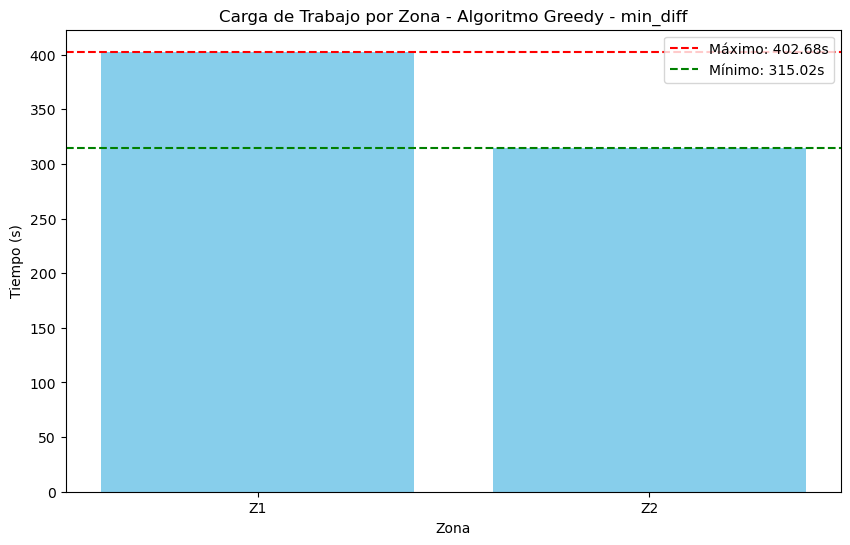

In [113]:
alg = 0 # 0: Greedy, 1: Layered, 2: GRASP

nombre_alg = ['Greedy', 'Layered', 'GRASP', 'Simulated Annealing']

plt.figure(figsize=(10, 6))
plt.bar(w_s[alg][0].keys(), w_s[alg][0].values(), color='skyblue')
plt.axhline(w_s[alg][1], color='r', linestyle='--', label=f'Máximo: {w_s[alg][1]:.2f}s')
plt.axhline(w_s[alg][2], color='g', linestyle='--', label=f'Mínimo: {w_s[alg][2]:.2f}s')
plt.title(f'Carga de Trabajo por Zona - Algoritmo {nombre_alg[alg]} - {OBJECTIVE}')
plt.xlabel('Zona')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

# Results comparision

min_diff


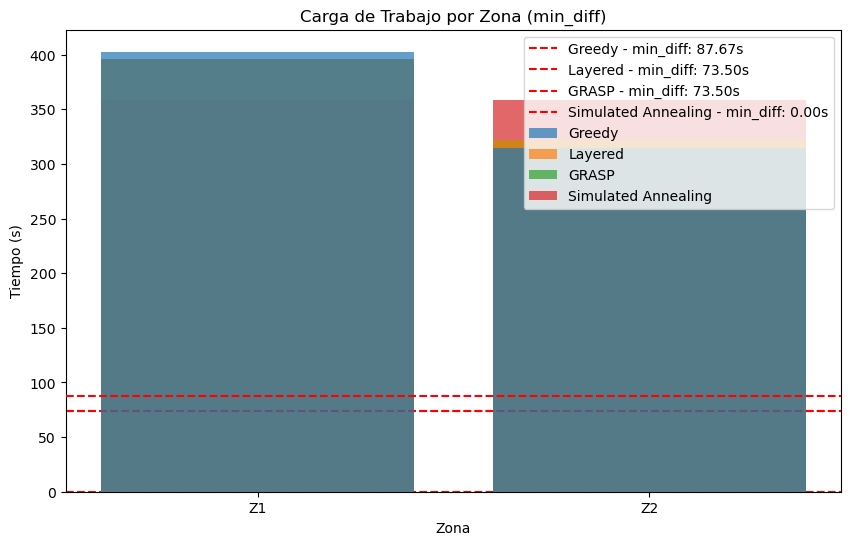

In [114]:
#Comparacion de resultados

print(OBJECTIVE)

def linea_objetivo(workloads, objective):
    if objective == 'min_avg':
        return sum(workloads.values())/len(workloads)
    elif objective == 'min_diff':
        return max(workloads.values()) - min(workloads.values())
    elif objective == 'min_max':
        return max(workloads.values())


def lista_linea_objetivos_por_alg(workloads_list, objective):
    lista = []
    for workloads in workloads_list:
        lista.append(linea_objetivo(workloads, objective))
    return lista      

def plot_workloads_comparison(workloads_list, labels, objective):
    lineas_objetivo = lista_linea_objetivos_por_alg(workloads_list, objective)
    plt.figure(figsize=(10, 6))
    for i, (workloads, label) in enumerate(zip(workloads_list, labels)):        
        plt.bar(workloads.keys(), workloads.values(), alpha=0.7, label=label, zorder=3-i)
        plt.axhline(lineas_objetivo[i], color='r', linestyle='--', label=f'{label} - {objective}: {lineas_objetivo[i]:.2f}s', zorder=3-i)
    plt.title(f'Carga de Trabajo por Zona ({objective})')
    plt.xlabel('Zona')
    plt.ylabel('Tiempo (s)')
    plt.legend()
    plt.show()

plot_workloads_comparison(
    [workloads_greedy, workloads_layer, workloads_grasp, workloads_sa], 
    ['Greedy', 'Layered', 'GRASP', 'Simulated Annealing'], 
    OBJECTIVE
)


In [115]:
#Ejecutar para 3 instancias, Data_PTL/Data_40_Salidas_composición_zonas_heterogéneas.xlsx, Data_PTL/Data_60_Salidas_composición_zonas_homogéneas.xlsx, Data_PTL/Data_80_Salidas_composición_zonas_heterogéneas.xlsx

#Metodo para leer los datos 

def read_data(file_path):
    excel_model = pd.ExcelFile(file_path)

    # Lectura de conjuntos
    Conjunto_pedidos = pd.read_excel(excel_model, 'Pedidos', index_col=0)
    Conjunto_zonas = pd.read_excel(excel_model, 'Zonas', index_col=0)
    Conjunto_salidas = pd.read_excel(excel_model, 'Salidas', index_col=0)
    Conjunto_skus = pd.read_excel(excel_model, 'SKU', index_col=0)

    # Lectura de parámetros de salidas
    N_Salidas = pd.read_excel(excel_model, 'Salidas_en_cada_zona', index_col=0)
    Salidas_por_zona = pd.read_excel(excel_model, 'Salidas_pertenece_zona', index_col=0)
    Tiempo_salidas = pd.read_excel(excel_model, 'Tiempo_salida', index_col=0)

    # Lectura de parámetros de SKUs
    SKUS_por_pedido = pd.read_excel(excel_model, 'SKU_pertenece_pedido', index_col=0)
    Tiempo_SKU = pd.read_excel(excel_model, 'Tiempo_SKU', index_col=0)

    # Lectura de parámetros adicionales
    Parametros = pd.read_excel(excel_model, 'Parametros', index_col=0)

    pedidos = list(Conjunto_pedidos.index)
    zonas = list(Conjunto_zonas.index)
    salidas = list(Conjunto_salidas.index)
    skus = list(Conjunto_skus.index)

    V = Parametros['v']
    ZN = Parametros ['zn']

    v = float(V.iloc[0])
    zn = float(ZN.iloc[0])


    # Salidas que están incluidas en cada zona
    s = {(j, k): Salidas_por_zona.at[j, k] for k in salidas for j in zonas}   
    
    rp = {(i, m): SKUS_por_pedido.at[i, m] for m in skus for i in pedidos}

    # Time to Pick an SKU at an Output
    d = {(j, k): Tiempo_salidas.at[j, k] for k in salidas for j in zonas}

    # Time to Process an SKU
    tra = {(i, m): Tiempo_SKU.at[i, m] for m in skus for i in pedidos}

    # Number of Outputs per Zone
    n_sal = N_Salidas.Num_Salidas

    return pedidos, zonas, salidas, skus, v, zn, s, d, tra, n_sal, rp

# 3 instancias
#instancias = ['Data_PTL/Data_40_Salidas_composición_zonas_heterogéneas.xlsx', 'Data_PTL/Data_60_Salidas_composición_zonas_homogéneas.xlsx', 'Data_PTL/Data_80_Salidas_composición_zonas_heterogéneas.xlsx']
# todas las instancias
instancias = ['Data_PTL/Data_40_Salidas_composición_zonas_heterogéneas.xlsx', 'Data_PTL/Data_40_Salidas_composición_zonas_homogéneas.xlsx', 'Data_PTL/Data_60_Salidas_composición_zonas_heterogéneas.xlsx', 'Data_PTL/Data_60_Salidas_composición_zonas_homogéneas.xlsx', 'Data_PTL/Data_80_Salidas_composición_zonas_heterogéneas.xlsx', 'Data_PTL/Data_80_Salidas_composición_zonas_homogéneas.xlsx']

def generate_order_info(pedidos, skus, tra=tra, rp=rp, s=s, d=d):
    order_info = {}
    for i in pedidos:
        # Tiempo base de procesamiento
        tiempo_procesamiento = sum(tra[(i, m)] for m in skus if rp[(i, m)] == 1)

        # Distancias mínimas por zona (solo zonas donde el pedido puede asignarse)
        distancias_zona = {}
        for j in zonas:
            # Posiciones disponibles en la zona j (s_jk=1)
            posiciones_zona = [k for k in salidas if s[(j, k)] == 1]
            if posiciones_zona:
                distancia_min = min(d[(j, k)] for k in posiciones_zona)
                distancias_zona[j] = distancia_min

        order_info[i] = {
            'tiempo': tiempo_procesamiento,
            'distancias': distancias_zona
        }

    return order_info


# Ejecutar algoritmos para cada instancia y guardar en un diccionario

results = {}

OBJECTIVE = 'min_diff' # Opciones: 'min_avg', 'min_diff', 'min_max'

for instance in instancias:
    pedidos, zonas, salidas, skus, v, zn, s, d, tra, n_sal = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    order_info = 0
    rp = 0
    print(f"\n--- Ejecutando Instancia: {instance} ---")
    pedidos, zonas, salidas, skus, v, zn, s, d, tra, n_sal, rp = read_data(instance)
    order_info = generate_order_info(pedidos, skus, tra, rp, s, d)
    
    # Ejecutar algoritmos
    assignments_greedy, workloads_greedy, t1 = greedy_construction(OBJECTIVE, pedidos, zonas, salidas, s, d, order_info, v, rp)
    assignments_layer, workloads_layer, t2 = layered_assignment_construction(OBJECTIVE, pedidos, zonas, salidas, s, d, order_info, v, rp)
    assignments_grasp, workloads_grasp, t3 = randomized_grasp_construction(OBJECTIVE, alpha=0.3, max_iter=100, pedidos=pedidos, zonas=zonas, salidas=salidas, s=s, d=d, order_info=order_info, v=v, rp=rp)
    assignments_sa, workloads_sa, t4 = simulated_annealing(assignments_greedy, workloads_greedy, OBJECTIVE, INITIAL_TEMP=1000, STOPPING_TEMP=1e-5, COOLING_RATE=0.999, max_time=240)
    assignments_lb, workloads_lb, t5 = local_beam_search([assignments_greedy], [workloads_greedy], OBJECTIVE, beam_width=3, max_iterations=100, max_time=120)
    
    # Verificar factibilidad
    print("\n🔍 Verificación Integral de Factibilidad:")
    print(f"Greedy:")
    comprehensive_feasibility_check(assignments_greedy, workloads_greedy, zonas, pedidos, d, v, order_info, n_sal, s)
    print(f"Layered:")
    comprehensive_feasibility_check(assignments_layer, workloads_layer, zonas, pedidos, d, v, order_info, n_sal, s)
    print(f"GRASP:")
    comprehensive_feasibility_check(assignments_grasp, workloads_grasp, zonas, pedidos, d, v, order_info, n_sal, s)
    print(f"Simulated Annealing:")
    comprehensive_feasibility_check(assignments_sa, workloads_sa, zonas, pedidos, d, v, order_info, n_sal, s)
    print(f"Local Beam Search:")
    comprehensive_feasibility_check(assignments_lb, workloads_lb, zonas, pedidos, d, v, order_info, n_sal, s)
    
    # Guardar resultados
    results[instance] = {
        'greedy': (assignments_greedy, workloads_greedy, t1),
        'layered': (assignments_layer, workloads_layer, t2),
        'grasp': (assignments_grasp, workloads_grasp, t3),
        'simulated_annealing': (assignments_sa, workloads_sa, t4),
        'local_beam_search': (assignments_lb, workloads_lb, t5)
    }


--- Ejecutando Instancia: Data_PTL/Data_40_Salidas_composición_zonas_heterogéneas.xlsx ---
Iter 0: mejora LB, métrica 59.9995
Iter 1: mejora LB, métrica 18.6662
Iter 2: mejora LB, métrica 4.1662
Iter 3: mejora LB, métrica 0.1662
Iter 12: mejora LB, métrica 0.0005

🔍 Verificación Integral de Factibilidad:
Greedy:
✅ Todas las restricciones se cumplen correctamente
Layered:
✅ Todas las restricciones se cumplen correctamente
GRASP:
✅ Todas las restricciones se cumplen correctamente
Simulated Annealing:
✅ Todas las restricciones se cumplen correctamente
Local Beam Search:
✅ Todas las restricciones se cumplen correctamente

--- Ejecutando Instancia: Data_PTL/Data_40_Salidas_composición_zonas_homogéneas.xlsx ---
Iter 0: mejora LB, métrica 6.7500
Iter 1: mejora LB, métrica 0.2500
Iter 3: mejora LB, métrica 0.0833

🔍 Verificación Integral de Factibilidad:
Greedy:
✅ Todas las restricciones se cumplen correctamente
Layered:
✅ Todas las restricciones se cumplen correctamente
GRASP:
✅ Todas las re

In [126]:
results[instancias[2]]['simulated_annealing'][1]

{'Z1': 388.4705643853394, 'Z2': 388.51629905935766, 'Z3': 388.43937182398105}

In [117]:
#Ahora la comparación con una tabla, dónde las filas son los algoritmos y las columnas las zonas, tiempo de computo, y el objetivo. Tambien hay una separacion por instancia

def generate_comparison_table(results):
    data = []
    for instance, algorithms in results.items():
        for algorithm, (assignments, workloads, time) in algorithms.items():
            name_instance = instance.split('/')[-1]
            row = {
                'Instancia': name_instance,
                'Algoritmo': algorithm,
                'Tiempo de Cómputo': time,
                'Objetivo': calculate_metric(workloads, OBJECTIVE),
                **workloads
            }
            data.append(row)
    return pd.DataFrame(data)

comparison_table = generate_comparison_table(results)
print("\nTabla de Comparación de Resultados, para el Objetivo:", OBJECTIVE)
comparison_table



Tabla de Comparación de Resultados, para el Objetivo: min_diff


,Instancia,Algoritmo,Tiempo de Cómputo,Objetivo,Z1,Z2,Z3,Z4
0,Data_40_Salidas_composición_zonas_heterogéneas...,greedy,0.000300,87.666207,402.682506,315.016299,NaN,NaN
1,Data_40_Salidas_composición_zonas_heterogéneas...,layered,0.000248,73.499540,395.599173,322.099632,NaN,NaN
2,Data_40_Salidas_composición_zonas_heterogéneas...,grasp,0.042946,73.499540,395.599173,322.099632,NaN,NaN
3,Data_40_Salidas_composición_zonas_heterogéneas...,simulated_annealing,9.531136,0.000460,358.849173,358.849632,NaN,NaN
4,Data_40_Salidas_composición_zonas_heterogéneas...,local_beam_search,3.268333,0.000460,358.849173,358.849632,NaN,NaN
5,Data_40_Salidas_composición_zonas_homogéneas.xlsx,greedy,0.000186,16.583333,350.082874,366.666207,NaN,NaN
6,Data_40_Salidas_composición_zonas_homogéneas.xlsx,layered,0.000230,5.250000,355.749540,360.999540,NaN,NaN
7,Data_40_Salidas_composición_zonas_homogéneas.xlsx,grasp,0.038805,5.250000,360.999540,355.749540,NaN,NaN
8,Data_40_Salidas_composición_zonas_homogéneas.xlsx,simulated_annealing,8.907208,0.083333,358.332874,358.416207,NaN,NaN
9,Data_40_Salidas_composición_zonas_homogéneas.xlsx,local_beam_search,3.686967,0.083333,358.332874,358.416207,NaN,NaN


In [118]:
# Tabla de comparación solo de layered y simulated annealing

comparison_table_layered_sa = comparison_table[comparison_table['Algoritmo'].isin(['layered', 'simulated_annealing'])]
comparison_table_layered_sa

,Instancia,Algoritmo,Tiempo de Cómputo,Objetivo,Z1,Z2,Z3,Z4
1,Data_40_Salidas_composición_zonas_heterogéneas...,layered,0.000248,73.499540,395.599173,322.099632,NaN,NaN
3,Data_40_Salidas_composición_zonas_heterogéneas...,simulated_annealing,9.531136,0.000460,358.849173,358.849632,NaN,NaN
6,Data_40_Salidas_composición_zonas_homogéneas.xlsx,layered,0.000230,5.250000,355.749540,360.999540,NaN,NaN
8,Data_40_Salidas_composición_zonas_homogéneas.xlsx,simulated_annealing,8.907208,0.083333,358.332874,358.416207,NaN,NaN
11,Data_60_Salidas_composición_zonas_heterogéneas...,layered,0.000460,63.605336,406.353011,347.516299,411.121635,NaN
13,Data_60_Salidas_composición_zonas_heterogéneas...,simulated_annealing,7.922432,0.076927,388.470564,388.516299,388.439372,NaN
16,Data_60_Salidas_composición_zonas_homogéneas.xlsx,layered,0.000428,0.250000,387.749540,387.916207,387.999540,NaN
18,Data_60_Salidas_composición_zonas_homogéneas.xlsx,simulated_annealing,23.781246,0.083333,387.832874,387.916207,387.916207,NaN
21,Data_80_Salidas_composición_zonas_heterogéneas...,layered,0.000683,80.582874,414.265840,333.932966,414.182506,333.682966
23,Data_80_Salidas_composición_zonas_heterogéneas...,simulated_annealing,56.122872,0.000460,374.015840,374.016299,374.015840,374.016299


In [119]:
# Tabla de comparación de constructivo, aleatoriezado, local search y best improvement
print("\nTabla de Comparación de Resultados, para el Objetivo:", OBJECTIVE)
comparison_table_4_methods = comparison_table[comparison_table['Algoritmo'].isin(['greedy', 'simulated_annealing', 'grasp', 'local_beam_search'])]
comparison_table_4_methods


Tabla de Comparación de Resultados, para el Objetivo: min_diff


,Instancia,Algoritmo,Tiempo de Cómputo,Objetivo,Z1,Z2,Z3,Z4
0,Data_40_Salidas_composición_zonas_heterogéneas...,greedy,0.000300,87.666207,402.682506,315.016299,NaN,NaN
2,Data_40_Salidas_composición_zonas_heterogéneas...,grasp,0.042946,73.499540,395.599173,322.099632,NaN,NaN
3,Data_40_Salidas_composición_zonas_heterogéneas...,simulated_annealing,9.531136,0.000460,358.849173,358.849632,NaN,NaN
4,Data_40_Salidas_composición_zonas_heterogéneas...,local_beam_search,3.268333,0.000460,358.849173,358.849632,NaN,NaN
5,Data_40_Salidas_composición_zonas_homogéneas.xlsx,greedy,0.000186,16.583333,350.082874,366.666207,NaN,NaN
7,Data_40_Salidas_composición_zonas_homogéneas.xlsx,grasp,0.038805,5.250000,360.999540,355.749540,NaN,NaN
8,Data_40_Salidas_composición_zonas_homogéneas.xlsx,simulated_annealing,8.907208,0.083333,358.332874,358.416207,NaN,NaN
9,Data_40_Salidas_composición_zonas_homogéneas.xlsx,local_beam_search,3.686967,0.083333,358.332874,358.416207,NaN,NaN
10,Data_60_Salidas_composición_zonas_heterogéneas...,greedy,0.000403,113.627798,429.810763,316.182966,418.977430,NaN
12,Data_60_Salidas_composición_zonas_heterogéneas...,grasp,0.084471,63.022002,406.103011,347.932966,410.954968,NaN


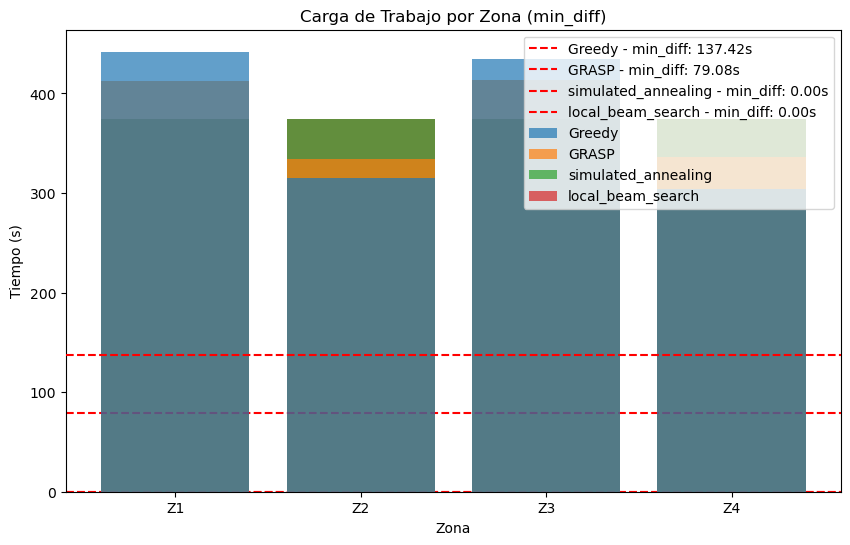

In [133]:
ins = 4

g1 = results[instancias[ins]]['greedy'][1]
g2 = results[instancias[ins]]['grasp'][1]
g3 = results[instancias[ins]]['simulated_annealing'][1]
g4 = results[instancias[ins]]['local_beam_search'][1]
plot_workloads_comparison(
    [g1, g2, g3, g4],
    ['Greedy', 'GRASP', 'simulated_annealing', 'local_beam_search'], 
    OBJECTIVE
)

# Statistic tests

In [120]:
from scipy.stats import wilcoxon

# Filtrar los resultados para los algoritmos "layered" y "simulated_annealing"
layered_obj = comparison_table_layered_sa[comparison_table_layered_sa['Algoritmo'] == 'layered']['Objetivo'].values
sa_obj = comparison_table_layered_sa[comparison_table_layered_sa['Algoritmo'] == 'simulated_annealing']['Objetivo'].values

# Realizar el test de Wilcoxon
stat, p_val = wilcoxon(layered_obj, sa_obj)

print(f"Estadístico de Wilcoxon: {stat:.4f}")
print(f"p-valor: {p_val:.4f}")

if p_val < 0.05:
    print("❗️ Diferencia significativa en el desempeño.")
else:
    print("✅ No se encontró diferencia significativa en el desempeño.")

Estadístico de Wilcoxon: 0.0000
p-valor: 0.0312
❗️ Diferencia significativa en el desempeño.


In [121]:
from statsmodels.formula.api import ols

import statsmodels.api as sm

# Ajustamos el modelo ANOVA utilizando "Objetivo" como respuesta y "Algoritmo" como factor
modelo = ols('Objetivo ~ C(Algoritmo)', data=comparison_table_layered_sa).fit()

anova_result = sm.stats.anova_lm(modelo, typ=2)
print("Resultados del ANOVA:")
print(anova_result)

Resultados del ANOVA:
                   sum_sq    df         F    PR(>F)
C(Algoritmo)  4154.368909   1.0  5.440453  0.041873
Residual      7636.072325  10.0       NaN       NaN


C:\Users\usuario\AppData\Local\Temp\ipykernel_9008\1056202124.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comparison_table_layered_sa, x='Algoritmo', y='Objetivo', palette='pastel')


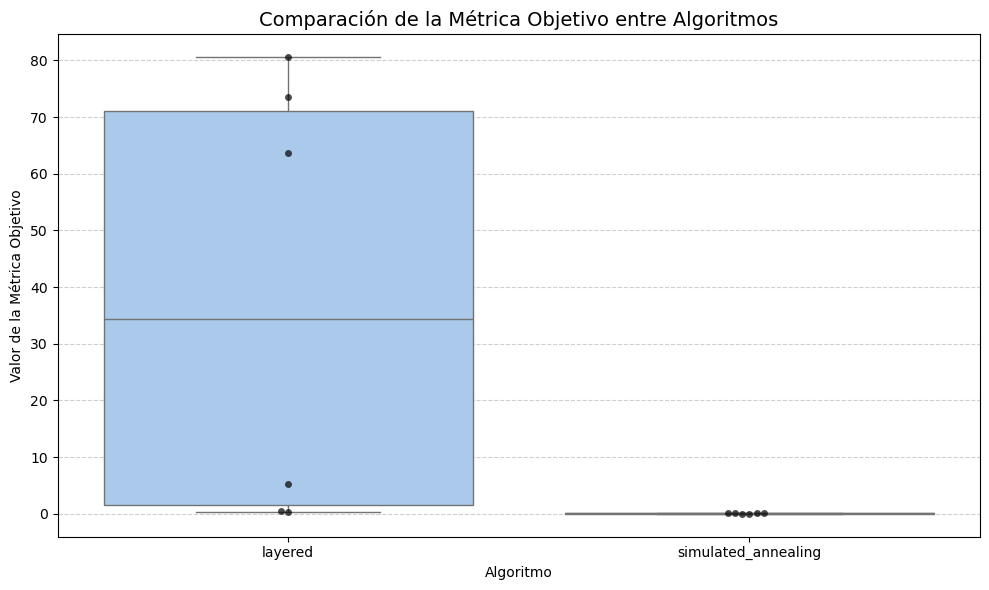

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico mejorado: boxplot + swarmplot para ver dispersión y diferencia

plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_table_layered_sa, x='Algoritmo', y='Objetivo', palette='pastel')
sns.swarmplot(data=comparison_table_layered_sa, x='Algoritmo', y='Objetivo', color='black', alpha=0.7)
plt.title("Comparación de la Métrica Objetivo entre Algoritmos", fontsize=14)
plt.ylabel("Valor de la Métrica Objetivo")
plt.xlabel("Algoritmo")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [123]:
# Visualización de la tabla de comparación para la instancia 1

#Comparacion de resultados

print(OBJECTIVE)

def linea_objetivo(workloads, objective):
    if objective == 'min_avg':
        return sum(workloads.values())/len(workloads)
    elif objective == 'min_diff':
        return max(workloads.values()) - min(workloads.values())
    elif objective == 'min_max':
        return max(workloads.values())


def lista_linea_objetivos_por_alg(workloads_list, objective):
    lista = []
    for workloads in workloads_list:
        lista.append(linea_objetivo(workloads, objective))
    return lista      

def plot_workloads_comparison(workloads_list, labels, objective):
    lineas_objetivo = lista_linea_objetivos_por_alg(workloads_list, objective)
    plt.figure(figsize=(10, 6))
    for i, (workloads, label) in enumerate(zip(workloads_list, labels)):        
        plt.bar(workloads.keys(), workloads.values(), alpha=0.7, label=label, zorder=3-i)
        plt.axhline(lineas_objetivo[i], color='r', linestyle='--', label=f'{label} - {objective}: {lineas_objetivo[i]:.2f}s', zorder=3-i)
    plt.title(f'Carga de Trabajo por Zona ({objective})')
    plt.xlabel('Zona')
    plt.ylabel('Tiempo (s)')
    plt.legend()
    plt.show()

algos = comparison_table_layered_sa['Algoritmo'].unique()
workloads_list = [comparison_table_layered_sa[comparison_table_layered_sa['Algoritmo'] == alg].iloc[0, 3:] for alg in algos]
# quitar nans y convertir a dict
workloads_list = [dict(zip(comparison_table_layered_sa.columns[3:], workloads)) for workloads in workloads_list]


plot_workloads_comparison(algos, workloads_list, OBJECTIVE)

min_diff


AttributeError: 'str' object has no attribute 'values'

In [ ]:
workloads_list

[{'Objetivo': 73.49954049086409,
  'Z1': 395.5991728835552,
  'Z2': 322.0996323926911,
  'Z3': nan,
  'Z4': nan},
 {'Objetivo': 0.0004595091361920822,
  'Z1': 358.84917288355547,
  'Z2': 358.84963239269166,
  'Z3': nan,
  'Z4': nan}]

# Export results

In [136]:
import os
import pandas as pd

def generar_reporte_excel(nombre_archivo, nombre_instancia, assignments, workloads):
    # Crear la carpeta "Reportes" si no existe
    carpeta_reportes = "Reportes"
    os.makedirs(carpeta_reportes, exist_ok=True)
    
    # Ruta completa del archivo
    ruta_archivo = os.path.join(carpeta_reportes, nombre_archivo)

    # Crear DataFrames
    w_max = max(workloads.values())
    nn = nombre_instancia.split('/')[-1]
    resumen_data = [[nn, zona, tiempo] 
                   for zona, tiempo in workloads.items() if tiempo == w_max]
    df_resumen = pd.DataFrame(resumen_data, columns=["Instancia", "Zona", "Maximo"])
    
    # Hoja 2: Solucion
    solucion_data = [[pedido, asignacion[1]]  # (j, k, Y_sel) -> k es la posición
                    for pedido, asignacion in assignments.items()]
    df_solucion = pd.DataFrame(solucion_data, columns=["Pedido", "Salida"])
    
    # Hoja 3: Metricas
    metricas_data = [[zona, tiempo] for zona, tiempo in workloads.items()]
    df_metricas = pd.DataFrame(metricas_data, columns=["Zona", "Tiempo"])
    
    # Configurar formato numérico
    formato_numerico = "{:,.1f}".format
    df_resumen["Maximo"] = df_resumen["Maximo"].apply(formato_numerico).str.replace(',', ';').str.replace('.', ',').str.replace(';', '.')
    df_metricas["Tiempo"] = df_metricas["Tiempo"].apply(formato_numerico).str.replace(',', ';').str.replace('.', ',').str.replace(';', '.')
    
    # Escribir a Excel
    with pd.ExcelWriter(ruta_archivo, engine='xlsxwriter') as writer:
        df_resumen.to_excel(writer, sheet_name='Resumen', index=False)
        df_solucion.to_excel(writer, sheet_name='Solucion', index=False)
        df_metricas.to_excel(writer, sheet_name='Metricas', index=False)
        
        # Ajustar ancho de columnas
        for hoja in writer.sheets:
            worksheet = writer.sheets[hoja]
            worksheet.set_column('A:C' if hoja == 'Resumen' else 'A:B', 20)

    print(f"Reporte guardado en: {ruta_archivo}")

# Generar reporte para cada instancia
for instance, algorithms in results.items():
    for algorithm, (assignments, workloads, time) in algorithms.items():
        nombre_archivo = f"Reporte_{instance.split('/')[-1]}_{algorithm}.xlsx"
        generar_reporte_excel(nombre_archivo, instance, assignments, workloads)


Reporte guardado en: Reportes\Reporte_Data_40_Salidas_composición_zonas_heterogéneas.xlsx_greedy.xlsx
Reporte guardado en: Reportes\Reporte_Data_40_Salidas_composición_zonas_heterogéneas.xlsx_layered.xlsx
Reporte guardado en: Reportes\Reporte_Data_40_Salidas_composición_zonas_heterogéneas.xlsx_grasp.xlsx
Reporte guardado en: Reportes\Reporte_Data_40_Salidas_composición_zonas_heterogéneas.xlsx_simulated_annealing.xlsx
Reporte guardado en: Reportes\Reporte_Data_40_Salidas_composición_zonas_heterogéneas.xlsx_local_beam_search.xlsx
Reporte guardado en: Reportes\Reporte_Data_40_Salidas_composición_zonas_homogéneas.xlsx_greedy.xlsx
Reporte guardado en: Reportes\Reporte_Data_40_Salidas_composición_zonas_homogéneas.xlsx_layered.xlsx
Reporte guardado en: Reportes\Reporte_Data_40_Salidas_composición_zonas_homogéneas.xlsx_grasp.xlsx
Reporte guardado en: Reportes\Reporte_Data_40_Salidas_composición_zonas_homogéneas.xlsx_simulated_annealing.xlsx
Reporte guardado en: Reportes\Reporte_Data_40_Salidas

# Algorithms flowcharts

In [ ]:
from graphviz import Digraph

def generar_flujograma():
    # Crear objeto Digraph con formato PNG, alta resolución y fondo personalizado
    f = Digraph('GreedyFlow', format='png')
    f.graph_attr.update(dpi='500', bgcolor='mintcream')
    f.attr(rankdir='TB', size='14', splines='true')
    
    # Atributos globales para nodos
    f.attr('node', style='filled', fontname='Helvetica', fontsize='12')
    
    # Definición de nodos con estilos y colores personalizados
    f.node('Inicio', 'Inicio', shape='ellipse', fillcolor='lightgreen')
    f.node('Init', 'Inicializar:\n- Workloads\n- Posiciones\n- Asignaciones', shape='box', fillcolor='orange')
    f.node('Sort', 'Ordenar pedidos según objetivo:\n- min_max: Mayor tiempo primero\n- Otros: Orden original', shape='box', fillcolor='gold')
    f.node('ForLoop', 'Para cada pedido en orden', shape='box', fillcolor='lightblue')
    f.node('GenCand', 'Generar candidatos:\n- Zonas disponibles\n- Posición más cercana\n- Calcular Y_i', shape='box', fillcolor='plum')
    f.node('CheckCand', '¿Candidatos disponibles?', shape='diamond', fillcolor='lightpink')
    f.node('Select', 'Selección por objetivo:\n- min_avg: Menor Y_i\n- min_diff: Menor diferencia\n- min_max: Menor nuevo máximo', shape='box', fillcolor='lightcyan')
    f.node('Update', 'Actualizar:\n- Workloads\n- Posiciones\n- Asignaciones', shape='box', fillcolor='lightsalmon')
    # Nuevo nodo para la decisión: ¿Quedan pedidos?
    f.node('MasPedidos', '¿Quedan pedidos?', shape='diamond', fillcolor='lightgrey')
    f.node('Error', 'Error:\nNo hay posiciones', shape='ellipse', fillcolor='red', fontcolor='white')
    f.node('Fin', 'Fin', shape='ellipse', fillcolor='lightgreen')
    
    # Conexiones del flujograma
    f.edge('Inicio', 'Init', color='black')
    f.edge('Init', 'Sort', color='black')
    f.edge('Sort', 'ForLoop', color='black')
    f.edge('ForLoop', 'GenCand', color='black')
    f.edge('GenCand', 'CheckCand', color='black')
    f.edge('CheckCand', 'Select', label='Sí', color='blue', fontname='Helvetica', fontsize='10')
    f.edge('CheckCand', 'Error', label='No', color='red', fontname='Helvetica', fontsize='10')
    f.edge('Select', 'Update', color='black')
    # Aquí se agrega el nodo de decisión para determinar si quedan pedidos
    f.edge('Update', 'MasPedidos', color='black')
    f.edge('MasPedidos', 'ForLoop', label='Sí', color='blue', fontname='Helvetica', fontsize='10')
    f.edge('MasPedidos', 'Fin', label='No', color='red', fontname='Helvetica', fontsize='10')
    
    # Renderizar y guardar el diagrama en el directorio actual
    f.render('flujograma_greedy', cleanup=True)
    return 'flujograma_greedy.png'

# Generar imagen y mostrar la ruta
ruta_imagen = generar_flujograma()
print(f"Flujograma generado en: {ruta_imagen}")


Flujograma generado en: flujograma_greedy.png


In [ ]:
from graphviz import Digraph
import numpy as np

def generar_flujograma_grasp():
    # Crear objeto Digraph con formato PNG, alta resolución y fondo personalizado
    f = Digraph('GRASPFlow', format='png', engine='dot')
    f.graph_attr.update(dpi='500', bgcolor='mintcream')
    f.attr(rankdir='TB', size='15,10', splines='true')
    
    # Atributos globales para nodos: estilo, fuente y tamaño
    f.attr('node', style='filled', fontname='Helvetica', fontsize='12')
    
    # Definir nodos principales con estilos y colores personalizados
    f.node('Inicio', 'Inicio GRASP', shape='ellipse', fillcolor='lightgreen')
    f.node('InitBest', 'Inicializar mejor solución:\nbest_assignments = None\nbest_metric = ∞', shape='box', fillcolor='orange')
    f.node('LoopStart', 'Iterar max_iter veces', shape='diamond', fillcolor='lightgrey')
    f.node('Reiniciar', 'Reinicializar estructuras:\n- Workloads\n- Available positions\n- Assignments', shape='box', fillcolor='lightblue')
    f.node('Ordenar', 'Ordenar pedidos:\n- Prioridad por tiempo\n- Componente aleatorio', shape='box', fillcolor='gold')
    f.node('ForEach', 'Para cada pedido', shape='box', fillcolor='lightblue')
    f.node('GenCand', 'Generar candidatos:\n- Zonas válidas\n- Calcular métrica', shape='box', fillcolor='plum')
    f.node('CheckCand', '¿Candidatos\ndisponibles?', shape='diamond', fillcolor='lightpink')
    f.node('BuildRCL', 'Construir RCL:\nthreshold = min + α*(max - min)', shape='box', fillcolor='lightcyan')
    f.node('SelectRCL', 'Selección aleatoria\ndesde RCL', shape='box', fillcolor='lightcyan')
    f.node('Update', 'Actualizar asignaciones\ny workloads', shape='box', fillcolor='lightsalmon')
    f.node('EvalSol', 'Evaluar solución:\nactual_metric = calcular_metric()', shape='box', fillcolor='lightgoldenrod')
    f.node('CheckBest', '¿actual_metric < best_metric?', shape='diamond', fillcolor='lightpink')
    f.node('UpdateBest', 'Actualizar mejor solución', shape='box', fillcolor='orange')
    f.node('Fin', 'Retornar mejor solución', shape='ellipse', fillcolor='lightgreen')
    f.node('Error', 'Error: Sin candidatos', shape='ellipse', fillcolor='red', fontcolor='white')

    # Conexiones principales con estilos (color de borde y etiquetas cuando corresponda)
    f.edge('Inicio', 'InitBest', color='black')
    f.edge('InitBest', 'LoopStart', color='black')
    f.edge('LoopStart', 'Reiniciar', label='Sí', color='blue', fontname='Helvetica', fontsize='10')
    f.edge('Reiniciar', 'Ordenar', color='black')
    f.edge('Ordenar', 'ForEach', color='black')
    f.edge('ForEach', 'GenCand', color='black')
    f.edge('GenCand', 'CheckCand', color='black')
    f.edge('CheckCand', 'BuildRCL', label='Sí', color='blue', fontname='Helvetica', fontsize='10')
    f.edge('BuildRCL', 'SelectRCL', color='black')
    f.edge('SelectRCL', 'Update', color='black')
    f.edge('Update', 'ForEach', color='black')
    f.edge('CheckCand', 'Error', label='No', color='red', fontname='Helvetica', fontsize='10')
    f.edge('ForEach', 'EvalSol', label='Todos asignados', color='black')
    f.edge('EvalSol', 'CheckBest', color='black')
    f.edge('CheckBest', 'UpdateBest', label='Sí', color='blue', fontname='Helvetica', fontsize='10')
    f.edge('UpdateBest', 'LoopStart', color='black')
    f.edge('CheckBest', 'LoopStart', label='No', color='red', fontname='Helvetica', fontsize='10')
    f.edge('LoopStart', 'Fin', label='Iteraciones completadas', color='black')
    
    # Subgrafo para el cálculo de métricas con estilo dashed y color personalizado en los nodos
    with f.subgraph(name='cluster_metrics') as c:
        c.attr(label='Cálculo de métricas', style='dashed')
        c.node('CalcMin', 'Calcular min_metric', shape='box', fillcolor='lightblue')
        c.node('CalcMax', 'Calcular max_metric', shape='box', fillcolor='lightblue')
        c.node('CalcThreshold', 'Calcular threshold', shape='box', fillcolor='lightblue')
        c.edge('GenCand', 'CalcMin', color='black')
        c.edge('CalcMin', 'CalcMax', color='black')
        c.edge('CalcMax', 'CalcThreshold', color='black')
        c.edge('CalcThreshold', 'BuildRCL', color='black')
    
    # Subgrafo para la función objetivo con estilo dashed y colores para los nodos
    with f.subgraph(name='cluster_objetivo') as c:
        c.attr(label='Selección por objetivo', style='dashed')
        c.node('ObjAvg', 'min_avg: promedio', shape='box', fillcolor='lightblue')
        c.node('ObjDiff', 'min_diff: diferencia', shape='box', fillcolor='lightblue')
        c.node('ObjMax', 'min_max: máximo', shape='box', fillcolor='lightblue')
        c.edge('GenCand', 'ObjAvg', color='black')
        c.edge('GenCand', 'ObjDiff', color='black')
        c.edge('GenCand', 'ObjMax', color='black')
    
    # Renderizar y guardar el diagrama en el directorio actual
    f.render('flujograma_grasp', cleanup=True)
    return 'flujograma_grasp.png'

# Generar imagen y mostrar la ruta
ruta_imagen = generar_flujograma_grasp()
print(f"Flujograma GRASP generado en: {ruta_imagen}")


Flujograma GRASP generado en: flujograma_grasp.png


In [ ]:
from graphviz import Digraph

def generar_flujograma_sa():
    f = Digraph('SAFlow', format='png', engine='dot')
    f.graph_attr.update(dpi='500', bgcolor='mintcream')
    f.attr(rankdir='TB', size='15,10', splines='true')
    f.attr('node', style='filled', fontname='Helvetica', fontsize='12')

    # Nodos principales
    f.node('Inicio', 'Inicio SA', shape='ellipse', fillcolor='lightgreen')
    f.node('InitSol', 'Copiar solución inicial:\n- current = initial\n- best = current\n- metric = calcular', shape='box', fillcolor='lightblue')
    f.node('InitTemp', 'Inicializar temperatura y tiempo', shape='box', fillcolor='lightblue')
    f.node('Condicion', '¿Tiempo restante y T > T_min?', shape='diamond', fillcolor='lightgrey')
    f.node('Vecino', 'Generar solución vecina\n(generar_neighbor)', shape='box', fillcolor='plum')
    f.node('Evaluar', 'Calcular métrica del vecino', shape='box', fillcolor='lightgoldenrod')
    f.node('Comparar', '¿Mejora (Δ < 0) o\naceptada por probabilidad?', shape='diamond', fillcolor='lightpink')
    f.node('ActualizarActual', 'Actualizar solución actual', shape='box', fillcolor='lightsalmon')
    f.node('Mejor', '¿Mejora la mejor solución?', shape='diamond', fillcolor='lightpink')
    f.node('ActualizarBest', 'Actualizar mejor solución', shape='box', fillcolor='orange')
    f.node('Enfriar', 'Reducir temperatura:\nT ← T * α', shape='box', fillcolor='lightcyan')
    f.node('Fin', 'Retornar mejor solución y tiempo', shape='ellipse', fillcolor='lightgreen')

    # Edges
    f.edge('Inicio', 'InitSol')
    f.edge('InitSol', 'InitTemp')
    f.edge('InitTemp', 'Condicion')
    f.edge('Condicion', 'Vecino', label='Sí')
    f.edge('Vecino', 'Evaluar')
    f.edge('Evaluar', 'Comparar')
    f.edge('Comparar', 'ActualizarActual', label='Sí')
    f.edge('ActualizarActual', 'Mejor')
    f.edge('Mejor', 'ActualizarBest', label='Sí')
    f.edge('ActualizarBest', 'Enfriar')
    f.edge('Mejor', 'Enfriar', label='No')
    f.edge('Comparar', 'Enfriar', label='No')
    f.edge('Enfriar', 'Condicion')
    f.edge('Condicion', 'Fin', label='No')

    # Subgrafo para vecindad
    with f.subgraph(name='cluster_vecindad') as c:
        c.attr(label='Vecindad (generate_neighbor)', style='dashed')
        c.node('Reasignar', 'Con probabilidad 0.5:\nIntentar reasignación', shape='box', fillcolor='lightsteelblue')
        c.node('Swap', 'Si no:\nIntentar swap aleatorio', shape='box', fillcolor='lightsteelblue')
        c.edge('Vecino', 'Reasignar')
        c.edge('Vecino', 'Swap')

    f.render('flujograma_sa', cleanup=True)
    return 'flujograma_sa.png'

ruta_flujo_sa = generar_flujograma_sa()
ruta_flujo_sa


'flujograma_sa.png'